# Smartphone dataset example

Aerobic actions were recorded from subjects using the Inertial Measurement Unit (IMU) on an Apple iPhone 4 smartphone. The IMU includes a 3D accelerometer, gyroscope, and magnetometer*. Each sample was taken at 60Hz, and manually trimmed to 500 samples (8.33s) to eliminate starting and stopping movements. iPhone is always clipped to the belt on the right hand side.

Each file contains 500 rows, each row with the following information:
Acc_x,Acc_y,Acc_z,Gyr_x,Gyr_y,Gyr_z,Mag_x,Mag_y,Mag_z

In [1]:
# execute if not installed
import sys
sys.path.insert(0, '../')

import mogptk

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%reload_ext autoreload
%autoreload 2

In [2]:
# plot config
sns.set_context('paper', font_scale=1.3)
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (10, 5)

# MOGP prediction on the sensor values

We use the 9 sensor values as channels, giving 9 channels in total.

All the data is sampled at 60Hz. With 500 samples (~8.3 segs) for each file.

def plot_experiment(model, ylims=None, title='Smartphone experiment'):
    """
    Plot smartphone mogptk example
    """
    x_train = model.data.X
    y_train = model.data.Y
    x_all = model.data.X_all
    y_all = model.data.Y_all
    x_pred = {i:array for i, array in enumerate(data.X_all)}
    
    try:
        x_pred, mean_pred, var_pred = model.predict(x_pred)
    except:
        pass
    
    names = ['Acc_x',
             'Acc_y',
             'Acc_z',
             'Gyr_x',
             'Gyr_y',
             'Gyr_z',
             'Mag_x',
             'Mag_y',
             'Mag_z']
    
    f, axarr = plt.subplots(3, 3, sharex=True, figsize=(20, 15))
    axarr = axarr.reshape(-1)
    
    for i in range(9):
        axarr[i].plot(x_train[i], y_train[i], '.k', label='Train')
        axarr[i].plot(x_all[i], y_all[i], '--', label='Test', c='gray')
        try:
            axarr[i].plot(x_pred[i], mean_pred[i], label='Test', c=sns.color_palette()[i])
            axarr[i].fill_between(x_pred[i].reshape(-1),
                                  mean_pred[i] + 2 * np.sqrt(var_pred[i]),
                                  mean_pred[i] - 2 * np.sqrt(var_pred[i]),
                                  label='95% c.i',
                                  color=sns.color_palette()[i],
                                  alpha=0.4)
        except:
            pass
        axarr[i].legend(ncol=2)
        axarr[i].set_title(names[i])
    plt.suptitle(title, y=1.02)
    plt.tight_layout()

## Example 1: Subject 1 bike 1,
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is in a bike.

In [3]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S05/bike3.csv', header=None)

# get values
y = df.values

# generate time values
t = (np.arange(0, 500) / 60)

In [6]:
# col names
cols = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z', 'Mag_x', 'Mag_y', 'Mag_z']

# data container
data = []

# add data to container
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

### Simulate sensor failure

In [8]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

In [10]:
# define model
model = mogptk.MOSM(data, Q=3)

# initialize parameters with BNSE
model.init_params('BNSE')

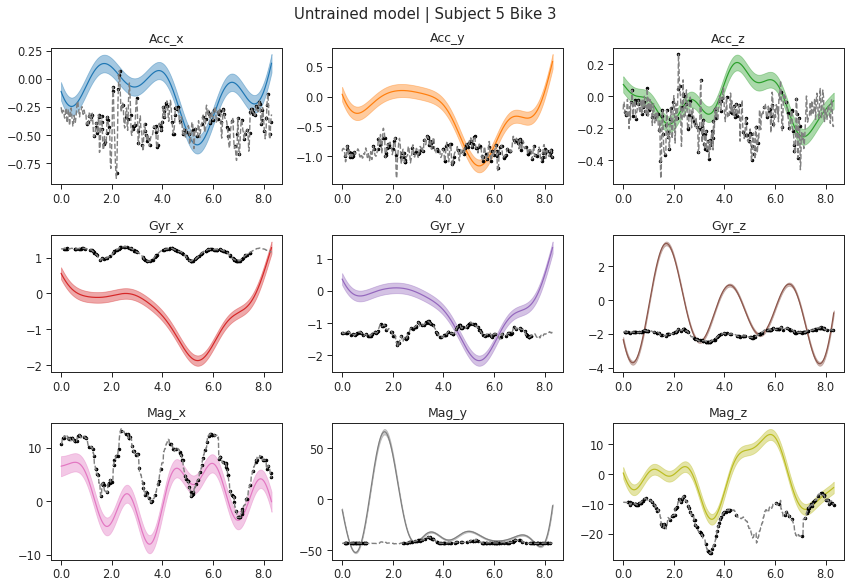

In [11]:
model.build()
model.plot_prediction(grid=(3,3), title='Untrained model | Subject 5 Bike 3')

In [12]:
%%time
# fit to data
model.train('L-BFGS-B', maxiter=3000, tol=1e-20)

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -833.595335
  Number of iterations: 3000
  Number of functions evaluations: 3273
Done in  20.43877551952998  minutes
CPU times: user 21min 48s, sys: 2min 39s, total: 24min 28s
Wall time: 20min 26s


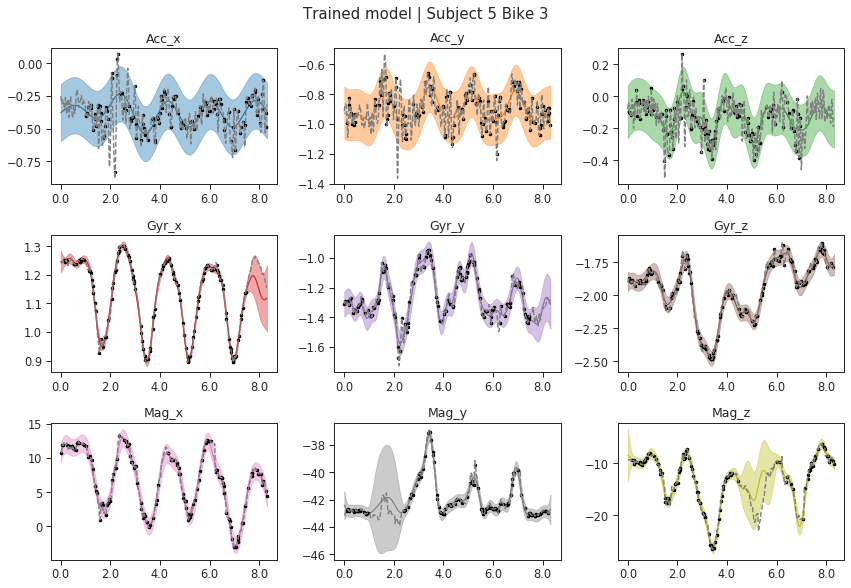

In [13]:
model.plot_prediction(grid=(3, 3), title='Trained model | Subject 5 Bike 3')

## Example 2: Subject 5 walking 3
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is walking.

In [14]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S01/walking2.csv', header=None)

# get values
y = df.values

# generate time values
t = np.arange(0, 500) / 60

# data container
data = []

# add data to container
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

In [16]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

In [17]:
%%time
# define model
model = mogptk.MOSM(data, Q=3)

# initialize parameters with BNSE
model.init_params()
model.build()

# fit to data
model.train('L-BFGS-B', maxiter=3000, tol=1e-20)

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 102.398869
  Number of iterations: 3000
  Number of functions evaluations: 3265
Done in  18.91843947569529  minutes
CPU times: user 25min 49s, sys: 2min 40s, total: 28min 29s
Wall time: 20min 53s


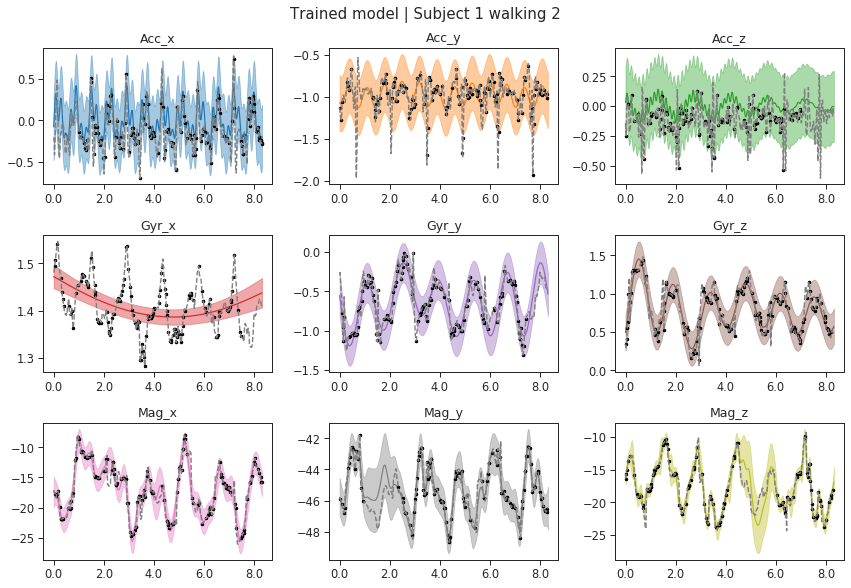

In [18]:
model.plot_prediction(grid=(3, 3), title='Trained model | Subject 1 walking 2')